In [1]:
# https://www.kaggle.com/datasets/ruthgn/beer-profile-and-ratings-data-set

# Import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
# Load the sample data as a pandas dataframe
df = pd.read_csv("./beer_data.csv")#, usecols=["Style", "ABV", "Min IBU", "Max IBU", "Astringency", "Body", "Alcohol", "Bitter", "Sweet", "Sour", "Salty", "Fruits", "Hoppy", "Spices", "Malty"])
df.head()

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,...,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,...,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,...,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,...,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,...,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96


In [3]:
df.columns.values

array(['Name', 'Style', 'Brewery', 'Beer Name (Full)', 'Description',
       'ABV', 'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol',
       'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices',
       'Malty', 'review_aroma', 'review_appearance', 'review_palate',
       'review_taste', 'review_overall', 'number_of_reviews'],
      dtype=object)

In [4]:
# Separate features and target variables
X = df.drop(columns=['Style', 'ABV', 'Name', 'Brewery', 'Beer Name (Full)', 'Description'])
y_style = df['Style']
y_abv = df['ABV']

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_style_train, y_style_test, y_abv_train, y_abv_test = train_test_split(
    X, y_style, y_abv, test_size=0.2, random_state=42
)

In [6]:
# Define transformers for numeric and categorical features
numeric_features = ['Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty',
                     'Fruits', 'Hoppy', 'Spices', 'Malty', 'review_aroma', 'review_appearance', 'review_palate',
                     'review_taste', 'review_overall', 'number_of_reviews']

# categorical_features = ['Name', 'Brewery', 'Beer Name (Full)', 'Description']

In [7]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

In [9]:
# Create a preprocessor that applies transformers to numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        # ('cat', categorical_transformer, categorical_features)
    ])

# Define a list of classifiers and regressors to compare
classifiers = {
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(random_state=42)
}

regressors = {
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Support Vector Regressor': SVR()
}

In [10]:
# Function to evaluate and plot performance metrics
def evaluate_and_plot(model_dict, X_train, X_test, y_train, y_test, metric_fn, metric_name, task):
    results = {}
    for name, model in model_dict.items():
        # Create a pipeline for the model
        if task == 'classification':
            pipeline = Pipeline(steps=[
                ('preprocessor', preprocessor),
                ('classifier', model)
            ])
            y_pred = pipeline.fit(X_train, y_train).predict(X_test)
        elif task == 'regression':
            pipeline = Pipeline(steps=[
                ('preprocessor', preprocessor),
                ('regressor', model)
            ])
            y_pred = pipeline.fit(X_train, y_train).predict(X_test)
        else:
            raise ValueError("Invalid task. Use 'classification' or 'regression'.")

        # Calculate the performance metric
        metric_value = metric_fn(y_test, y_pred)
        results[name] = metric_value

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.bar(results.keys(), results.values())
    plt.title(f'{metric_name} for {task.capitalize()} Models')
    plt.xlabel('Model')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.show()

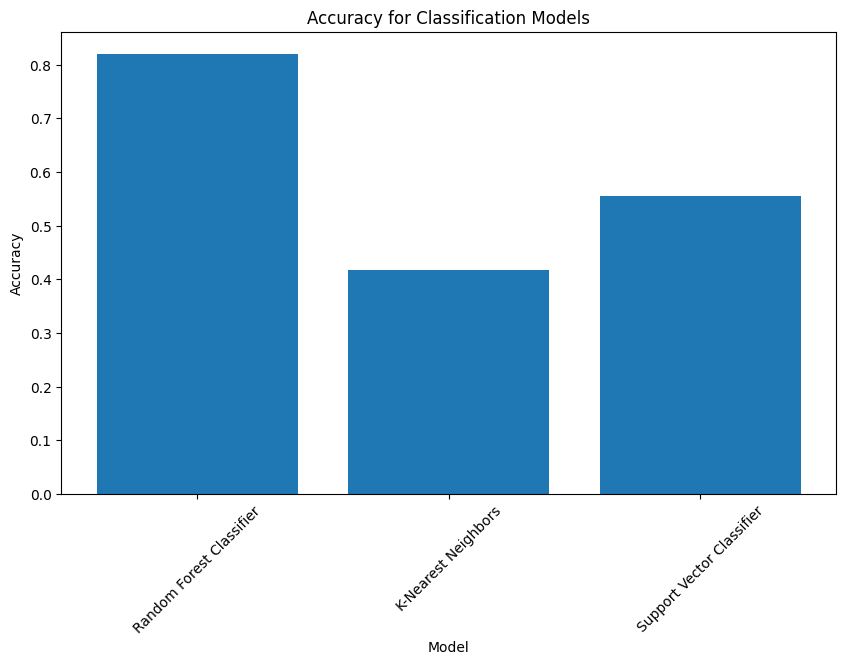

In [11]:
# Evaluate and plot classification models
evaluate_and_plot(classifiers, X_train, X_test, y_style_train, y_style_test, accuracy_score, 'Accuracy', 'classification')

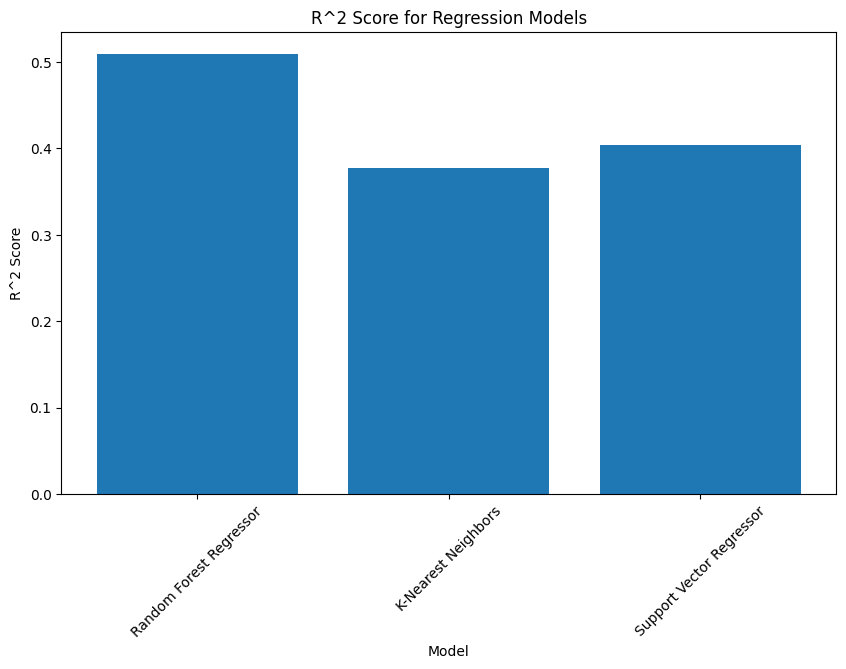

In [12]:
# Evaluate and plot regression models
evaluate_and_plot(regressors, X_train, X_test, y_abv_train, y_abv_test, r2_score, 'R^2 Score', 'regression')